removing small regions
removing small regions
removing small regions


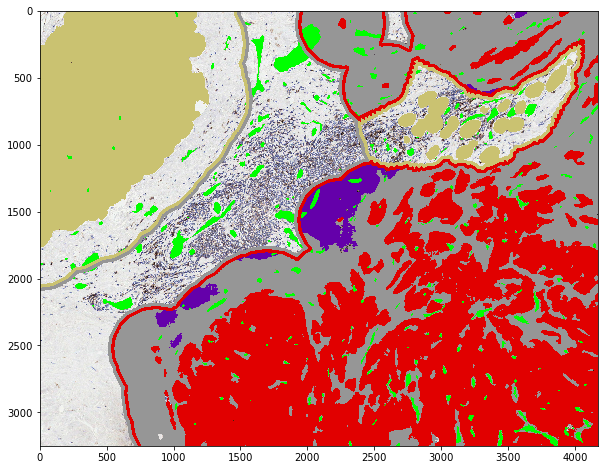

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  7 13:16:57 2020

@author: whitma01
"""


from PIL import Image
import numpy as np
from skimage import morphology
import os
import datetime
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None

def remove_small_regions(m_mask, threshold): 

    img = sitk.GetImageFromArray(m_mask)
    cca = sitk.ConnectedComponentImageFilter()
    cca_image = cca.Execute(img)
    stats = sitk.LabelShapeStatisticsImageFilter()                                                                                                                                     
    stats.Execute(cca_image)

    relabelMap =  { i : 0 for i in stats.GetLabels() if stats.GetNumberOfPixels(i) < threshold }
    output = sitk.ChangeLabel(cca_image, changeMap=relabelMap)

    del img
    del cca
    del cca_image
    del stats

    m_mask_inverse = sitk.GetArrayFromImage(output)
    m_mask_inverse = m_mask_inverse != 0
    return m_mask_inverse

directory = "illustration_regions/"


mask_Tumor = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Tumor.png")
mask_Tumor = np.array(mask_Tumor)
mask_Tumor = np.uint8(mask_Tumor)
print("removing small regions")
mask_Tumor = remove_small_regions(mask_Tumor, 1000)
mask_Tumor = np.uint8(mask_Tumor)  
    
mask_Adipose = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Adipose.png")
mask_Adipose = np.array(mask_Adipose)
mask_Adipose = np.uint8(mask_Adipose)
print("removing small regions")
mask_Adipose = remove_small_regions(mask_Adipose, 1000)
mask_Adipose = np.uint8(mask_Adipose)  
    
mask_vessel = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Vessel.png")
mask_vessel = np.array(mask_vessel)
mask_vessel = np.uint8(mask_vessel)
print("removing small regions")
mask_vessel = remove_small_regions(mask_vessel, 40)
mask_vessel = np.uint8(mask_vessel)  


mask_Lymphocytes = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Lymphocytes.png")
mask_Lymphocytes = np.array(mask_Lymphocytes)
mask_Lymphocytes = np.uint8(mask_Lymphocytes)

mask_Stroma_original = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Stroma.png")
mask_Stroma_original = np.array(mask_Stroma_original)
mask_Stroma_original = np.uint8(mask_Stroma_original)


kernel_size = 25
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1



mask_Tumor2 = cv2.dilate(mask_Tumor,kernel,iterations = 1)
mask_Tumor2 = cv2.subtract(mask_Tumor2,mask_Adipose)
mask_Adipose2 = cv2.dilate(mask_Adipose,kernel,iterations = 1)
mask_Adipose2 = cv2.subtract(mask_Adipose2,mask_Tumor2)
for i in range(11):
    mask_Tumor2 = cv2.dilate(mask_Tumor2,kernel,iterations = 1)
    mask_Tumor2 = cv2.subtract(mask_Tumor2,mask_Adipose2)
    mask_Adipose2 = cv2.dilate(mask_Adipose2,kernel,iterations = 1)
    mask_Adipose2 = cv2.subtract(mask_Adipose2,mask_Tumor2)


# mask_Adipose2 = cv2.dilate(mask_Adipose,kernel,iterations = 1)
# mask_Adipose2 = cv2.subtract(mask_Adipose2,mask_Tumor2)
# mask_Tumor2 = cv2.dilate(mask_Tumor,kernel,iterations = 1)
# mask_Tumor2 = cv2.subtract(mask_Tumor2,mask_Adipose)
# for i in range(3):
#     mask_Adipose2 = cv2.dilate(mask_Adipose2,kernel,iterations = 1)
#     mask_Adipose2 = cv2.subtract(mask_Adipose2,mask_Tumor2)
#     mask_Tumor2 = cv2.dilate(mask_Tumor2,kernel,iterations = 1)
#     mask_Tumor2 = cv2.subtract(mask_Tumor2,mask_Adipose2)

# mask_Tumor2 = cv2.dilate(mask_Tumor,kernel,iterations = 1)
# mask_Adipose2 = cv2.dilate(mask_Adipose,kernel,iterations = 1)
# mask_Adipose2 = cv2.subtract(mask_Adipose2,mask_Tumor2)
# for i in range(3):
#     mask_Tumor2 = cv2.dilate(mask_Tumor2,kernel,iterations = 1)
#     mask_Adipose2 = cv2.dilate(mask_Adipose2,kernel,iterations = 1)
#     mask_Tumor2 = cv2.subtract(mask_Tumor2,mask_Adipose2)

mask_Stroma = np.ones((mask_Tumor.shape[0],mask_Tumor.shape[1]), np.uint8)
mask_Stroma = cv2.subtract(mask_Stroma,mask_Tumor2)
mask_Stroma = cv2.subtract(mask_Stroma,mask_Adipose2)

# kernel_size = 20
# kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
# y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
# kernel_area = x**2+y**2 <= kernel_size**2
# kernel[kernel_area] = 1

mask_Tumor3 = cv2.erode(mask_Tumor2,kernel,iterations = 1)
mask_Adipose3 = cv2.erode(mask_Adipose2,kernel,iterations = 1)
mask_Stroma3 = cv2.erode(mask_Stroma,kernel,iterations = 1)


img_original = cv2.imread('illustration_regions/685040.svs (1, 37141, 31943, 4171, 3251).jpg')


height, width, channels = img_original.shape

for x in range(0, width):
    for y in range(0, height):
        
        if mask_Stroma_original[y,x] > 0 and mask_Tumor2[y,x] > 0 :
            img_original[y,x,0] = 150
            img_original[y,x,1] = 150
            img_original[y,x,2] = 150
        
        if mask_Lymphocytes[y,x] > 0 and mask_Tumor2[y,x] > 0 :
            img_original[y,x,0] = 170
            img_original[y,x,1] = 0
            img_original[y,x,2] = 100
            
        if mask_vessel[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
        
        if mask_Stroma[y,x] > 0 and not mask_Stroma3[y,x] > 0 :
            img_original[y,x,0] = 150
            img_original[y,x,1] = 150
            img_original[y,x,2] = 150
        
        if mask_Tumor[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
        
        if mask_Tumor2[y,x] > 0 and not mask_Tumor3[y,x] > 0 :
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Adipose[y,x] > 0:
            img_original[y,x,0] = 163 - 50
            img_original[y,x,1] = 244 - 50
            img_original[y,x,2] = 252 - 50
            
        if mask_Adipose2[y,x] > 0 and not mask_Adipose3[y,x] > 0 :
            img_original[y,x,0] = 113
            img_original[y,x,1] = 194
            img_original[y,x,2] = 202
            
cv2.imwrite('illustration_regions/illustration_Adipose_Stroma_Tumor.jpg', img_original)

img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
plt.imshow(img_original, interpolation='nearest')
plt.show()




removing small regions
removing small regions


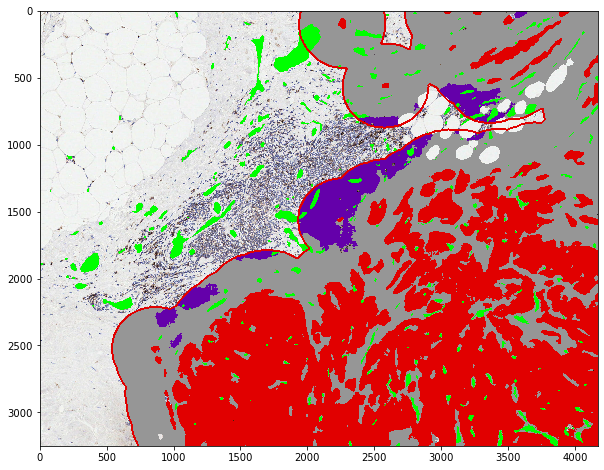

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  7 13:16:57 2020

@author: whitma01
"""


from PIL import Image
import numpy as np
from skimage import morphology
import os
import datetime
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None

def remove_small_regions(m_mask, threshold): 

    img = sitk.GetImageFromArray(m_mask)
    cca = sitk.ConnectedComponentImageFilter()
    cca_image = cca.Execute(img)
    stats = sitk.LabelShapeStatisticsImageFilter()                                                                                                                                     
    stats.Execute(cca_image)

    relabelMap =  { i : 0 for i in stats.GetLabels() if stats.GetNumberOfPixels(i) < threshold }
    output = sitk.ChangeLabel(cca_image, changeMap=relabelMap)

    del img
    del cca
    del cca_image
    del stats

    m_mask_inverse = sitk.GetArrayFromImage(output)
    m_mask_inverse = m_mask_inverse != 0
    return m_mask_inverse


directory = "illustration_regions/"


kernel_size = 50
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

# mask_Lymphocytes = Image.open(directory + "685040.svs_Lymphocytes_(1, 37141, 31943, 4171, 3251)-mask.png")
# mask_Lymphocytes = np.array(mask_Lymphocytes)
# mask_Lymphocytes = np.uint8(mask_Lymphocytes)
    
mask_Tumor = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Tumor.png")
mask_Tumor = np.array(mask_Tumor)
mask_Tumor = np.uint8(mask_Tumor)
print("removing small regions")
mask_Tumor = remove_small_regions(mask_Tumor, 1000)
mask_Tumor = np.uint8(mask_Tumor)  
    
mask_Lymphocytes = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Lymphocytes.png")
mask_Lymphocytes = np.array(mask_Lymphocytes)
mask_Lymphocytes = np.uint8(mask_Lymphocytes)
    
mask_vessel = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Vessel.png")
mask_vessel = np.array(mask_vessel)
mask_vessel = np.uint8(mask_vessel)
print("removing small regions")
mask_vessel = remove_small_regions(mask_vessel, 40)
mask_vessel = np.uint8(mask_vessel)  

mask_Stroma = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Stroma.png")
mask_Stroma = np.array(mask_Stroma)
mask_Stroma = np.uint8(mask_Stroma)


mask_Tumor2 = cv2.dilate(mask_Tumor,kernel,iterations = 6)

kernel_size = 15
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

mask_Tumor3 = cv2.erode(mask_Tumor2,kernel,iterations = 1)
#mask_Adipose3 = cv2.erode(mask_Adipose2,kernel,iterations = 1)
#mask_Stroma3 = cv2.erode(mask_Stroma,kernel,iterations = 1)


img_original = cv2.imread('illustration_regions/685040.svs (1, 37141, 31943, 4171, 3251).jpg')


height, width, channels = img_original.shape

for x in range(0, width):
    for y in range(0, height):   

        
        #img_original[y,x,0] = 150
        #img_original[y,x,1] = 150
        #img_original[y,x,2] = 150
            
        if mask_vessel[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
        
        if mask_Stroma[y,x] > 0 and mask_Tumor2[y,x] > 0 :
            img_original[y,x,0] = 150
            img_original[y,x,1] = 150
            img_original[y,x,2] = 150
        
        if mask_Tumor[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Lymphocytes[y,x] > 0 and mask_Tumor2[y,x] > 0 :
            img_original[y,x,0] = 170
            img_original[y,x,1] = 0
            img_original[y,x,2] = 100
        
        if mask_Tumor2[y,x] > 0 and not mask_Tumor3[y,x] > 0 :
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
            
cv2.imwrite('illustration_regions/illustration_Vessel_Lymphocyte_Stroma_Tumor.jpg', img_original)



img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
plt.imshow(img_original, interpolation='nearest')
plt.show()



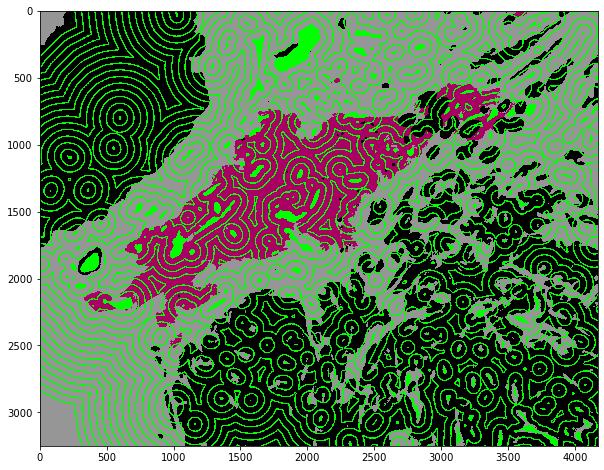

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  7 13:16:57 2020

@author: whitma01
"""


from PIL import Image
import numpy as np
from skimage import morphology
import os
import datetime
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None


def remove_small_regions(m_mask, threshold): 

    img = sitk.GetImageFromArray(m_mask)
    cca = sitk.ConnectedComponentImageFilter()
    cca_image = cca.Execute(img)
    stats = sitk.LabelShapeStatisticsImageFilter()                                                                                                                                     
    stats.Execute(cca_image)

    relabelMap =  { i : 0 for i in stats.GetLabels() if stats.GetNumberOfPixels(i) < threshold }
    output = sitk.ChangeLabel(cca_image, changeMap=relabelMap)

    del img
    del cca
    del cca_image
    del stats

    m_mask_inverse = sitk.GetArrayFromImage(output)
    m_mask_inverse = m_mask_inverse != 0
    return m_mask_inverse

directory = "illustration_regions/"


kernel_size = 50
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

mask_Lymphocytes = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Lymphocytes.png")
mask_Lymphocytes = np.array(mask_Lymphocytes)
mask_Lymphocytes = np.uint8(mask_Lymphocytes)


mask_Stroma = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Stroma.png")
mask_Stroma = np.array(mask_Stroma)
mask_Stroma = np.uint8(mask_Stroma)

    
mask_vessel = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Vessel.png")
mask_vessel = np.array(mask_vessel)
mask_vessel = remove_small_regions(mask_vessel, 40)
mask_vessel = np.uint8(mask_vessel)


mask_vessel_dilated = cv2.dilate(mask_vessel,kernel,iterations = 1)   
mask_vessel_dilated2 = cv2.dilate(mask_vessel_dilated,kernel,iterations = 1)   
mask_vessel_dilated3 = cv2.dilate(mask_vessel_dilated2,kernel,iterations = 1)   
mask_vessel_dilated4 = cv2.dilate(mask_vessel_dilated3,kernel,iterations = 1)   
mask_vessel_dilated5 = cv2.dilate(mask_vessel_dilated4,kernel,iterations = 1)   
mask_vessel_dilated6 = cv2.dilate(mask_vessel_dilated5,kernel,iterations = 1)   
mask_vessel_dilated7 = cv2.dilate(mask_vessel_dilated6,kernel,iterations = 1)   
mask_vessel_dilated8 = cv2.dilate(mask_vessel_dilated7,kernel,iterations = 1)    
mask_vessel_dilated9 = cv2.dilate(mask_vessel_dilated8,kernel,iterations = 1)   
mask_vessel_dilated10 = cv2.dilate(mask_vessel_dilated9,kernel,iterations = 1)    
mask_vessel_dilated11 = cv2.dilate(mask_vessel_dilated10,kernel,iterations = 1)    
mask_vessel_dilated12 = cv2.dilate(mask_vessel_dilated11,kernel,iterations = 1)    
mask_vessel_dilated13 = cv2.dilate(mask_vessel_dilated12,kernel,iterations = 1)    
mask_vessel_dilated14 = cv2.dilate(mask_vessel_dilated13,kernel,iterations = 1)
mask_vessel_dilated15 = cv2.dilate(mask_vessel_dilated14,kernel,iterations = 1)
 

kernel_size = 10
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

#mask_Lymphocytes_eroded = cv2.erode(mask_Lymphocytes,kernel,iterations = 1)
mask_vessel_eroded = cv2.erode(mask_vessel_dilated,kernel,iterations = 1)   
mask_vessel2_eroded = cv2.erode(mask_vessel_dilated2,kernel,iterations = 1)   
mask_vessel3_eroded = cv2.erode(mask_vessel_dilated3,kernel,iterations = 1)    
mask_vessel4_eroded = cv2.erode(mask_vessel_dilated4,kernel,iterations = 1)    
mask_vessel5_eroded = cv2.erode(mask_vessel_dilated5,kernel,iterations = 1)    
mask_vessel6_eroded = cv2.erode(mask_vessel_dilated6,kernel,iterations = 1)  
mask_vessel7_eroded = cv2.erode(mask_vessel_dilated7,kernel,iterations = 1)   
mask_vessel8_eroded = cv2.erode(mask_vessel_dilated8,kernel,iterations = 1)     
mask_vessel9_eroded = cv2.erode(mask_vessel_dilated9,kernel,iterations = 1)    
mask_vessel10_eroded = cv2.erode(mask_vessel_dilated10,kernel,iterations = 1)    
mask_vessel11_eroded = cv2.erode(mask_vessel_dilated11,kernel,iterations = 1)     
mask_vessel12_eroded = cv2.erode(mask_vessel_dilated12,kernel,iterations = 1)     
mask_vessel13_eroded = cv2.erode(mask_vessel_dilated13,kernel,iterations = 1)     
mask_vessel14_eroded = cv2.erode(mask_vessel_dilated14,kernel,iterations = 1)     
mask_vessel15_eroded = cv2.erode(mask_vessel_dilated15,kernel,iterations = 1) 

img_original = cv2.imread('illustration_regions/685040.svs (1, 37141, 31943, 4171, 3251).jpg')


height, width, channels = img_original.shape

for x in range(0, width):
    for y in range(0, height):   
        img_original[y,x,0] = 0
        img_original[y,x,1] = 0
        img_original[y,x,2] = 0   
        
     
        if mask_Lymphocytes[y,x] > 0:
            img_original[y,x,0] = 170
            img_original[y,x,1] = 0
            img_original[y,x,2] = 100
            
        if mask_Stroma[y,x] > 0:
            img_original[y,x,0] = 150
            img_original[y,x,1] = 150
            img_original[y,x,2] = 150
            
        if mask_vessel_dilated15[y,x] > 0 and mask_vessel15_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated14[y,x] > 0 and mask_vessel14_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated13[y,x] > 0 and mask_vessel13_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated12[y,x] > 0 and mask_vessel12_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated11[y,x] > 0 and mask_vessel11_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated10[y,x] > 0 and mask_vessel10_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated9[y,x] > 0 and mask_vessel9_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated8[y,x] > 0 and mask_vessel8_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
            
        if mask_vessel_dilated7[y,x] > 0 and mask_vessel7_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated6[y,x] > 0 and mask_vessel6_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated5[y,x] > 0 and mask_vessel5_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated4[y,x] > 0 and mask_vessel4_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated3[y,x] > 0 and mask_vessel3_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated2[y,x] > 0 and mask_vessel2_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel_dilated[y,x] > 0 and mask_vessel_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0

        if mask_vessel[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
        
            
            
cv2.imwrite('illustration_regions/illustration_Vessel.jpg', img_original)

plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
plt.imshow(img_original, interpolation='nearest')
plt.show()





removing small regions
removing small regions


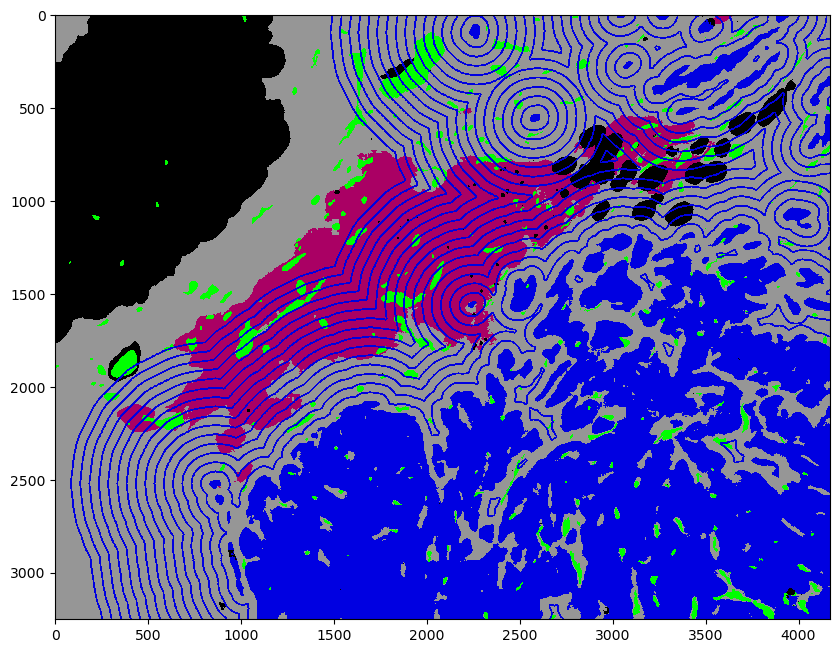

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  7 13:16:57 2020

@author: whitma01
"""


from PIL import Image
import numpy as np
from skimage import morphology
import os
import datetime
import cv2
import SimpleITK as sitk
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None


def remove_small_regions(m_mask, threshold): 

    img = sitk.GetImageFromArray(m_mask)
    cca = sitk.ConnectedComponentImageFilter()
    cca_image = cca.Execute(img)
    stats = sitk.LabelShapeStatisticsImageFilter()                                                                                                                                     
    stats.Execute(cca_image)

    relabelMap =  { i : 0 for i in stats.GetLabels() if stats.GetNumberOfPixels(i) < threshold }
    output = sitk.ChangeLabel(cca_image, changeMap=relabelMap)

    del img
    del cca
    del cca_image
    del stats

    m_mask_inverse = sitk.GetArrayFromImage(output)
    m_mask_inverse = m_mask_inverse != 0
    return m_mask_inverse


directory = "illustration_regions/"


kernel_size = 50
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

mask_Lymphocytes = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Lymphocytes.png")
mask_Lymphocytes = np.array(mask_Lymphocytes)
mask_Lymphocytes = np.uint8(mask_Lymphocytes)


mask_Stroma = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Stroma.png")
mask_Stroma = np.array(mask_Stroma)
mask_Stroma = np.uint8(mask_Stroma)

    
mask_Tumor = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Tumor.png")
mask_Tumor = np.array(mask_Tumor)
print("removing small regions")
mask_Tumor = remove_small_regions(mask_Tumor, 1000)
mask_Tumor = np.uint8(mask_Tumor)  

# plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
# plt.imshow(mask_Tumor, interpolation='nearest')
# plt.show()


mask_vessel = Image.open(directory + "685040.svs (1, 37141, 31943, 4171, 3251)_Vessel.png")
mask_vessel = np.array(mask_vessel)
mask_vessel = np.uint8(mask_vessel)
print("removing small regions")
mask_vessel = remove_small_regions(mask_vessel, 40)
mask_vessel = np.uint8(mask_vessel) 

mask_Tumor_dilated = cv2.dilate(mask_Tumor,kernel,iterations = 1)   
mask_Tumor_dilated2 = cv2.dilate(mask_Tumor_dilated,kernel,iterations = 1)   
mask_Tumor_dilated3 = cv2.dilate(mask_Tumor_dilated2,kernel,iterations = 1)   
mask_Tumor_dilated4 = cv2.dilate(mask_Tumor_dilated3,kernel,iterations = 1)   
mask_Tumor_dilated5 = cv2.dilate(mask_Tumor_dilated4,kernel,iterations = 1)   
mask_Tumor_dilated6 = cv2.dilate(mask_Tumor_dilated5,kernel,iterations = 1)   
mask_Tumor_dilated7 = cv2.dilate(mask_Tumor_dilated6,kernel,iterations = 1)   
mask_Tumor_dilated8 = cv2.dilate(mask_Tumor_dilated7,kernel,iterations = 1)    
mask_Tumor_dilated9 = cv2.dilate(mask_Tumor_dilated8,kernel,iterations = 1)   
mask_Tumor_dilated10 = cv2.dilate(mask_Tumor_dilated9,kernel,iterations = 1)    
mask_Tumor_dilated11 = cv2.dilate(mask_Tumor_dilated10,kernel,iterations = 1)    
mask_Tumor_dilated12 = cv2.dilate(mask_Tumor_dilated11,kernel,iterations = 1)    
mask_Tumor_dilated13 = cv2.dilate(mask_Tumor_dilated12,kernel,iterations = 1)    
mask_Tumor_dilated14 = cv2.dilate(mask_Tumor_dilated13,kernel,iterations = 1)
mask_Tumor_dilated15 = cv2.dilate(mask_Tumor_dilated14,kernel,iterations = 1)
 

kernel_size = 10
kernel = np.zeros((2*kernel_size+1,2*kernel_size+1), np.uint8)
y,x = np.ogrid[-kernel_size: kernel_size+1, -kernel_size: kernel_size+1]
kernel_area = x**2+y**2 <= kernel_size**2
kernel[kernel_area] = 1

#mask_Lymphocytes_eroded = cv2.erode(mask_Lymphocytes,kernel,iterations = 1)
mask_Tumor_eroded = cv2.erode(mask_Tumor_dilated,kernel,iterations = 1)   
mask_Tumor2_eroded = cv2.erode(mask_Tumor_dilated2,kernel,iterations = 1)   
mask_Tumor3_eroded = cv2.erode(mask_Tumor_dilated3,kernel,iterations = 1)    
mask_Tumor4_eroded = cv2.erode(mask_Tumor_dilated4,kernel,iterations = 1)    
mask_Tumor5_eroded = cv2.erode(mask_Tumor_dilated5,kernel,iterations = 1)    
mask_Tumor6_eroded = cv2.erode(mask_Tumor_dilated6,kernel,iterations = 1)  
mask_Tumor7_eroded = cv2.erode(mask_Tumor_dilated7,kernel,iterations = 1)   
mask_Tumor8_eroded = cv2.erode(mask_Tumor_dilated8,kernel,iterations = 1)     
mask_Tumor9_eroded = cv2.erode(mask_Tumor_dilated9,kernel,iterations = 1)    
mask_Tumor10_eroded = cv2.erode(mask_Tumor_dilated10,kernel,iterations = 1)    
mask_Tumor11_eroded = cv2.erode(mask_Tumor_dilated11,kernel,iterations = 1)     
mask_Tumor12_eroded = cv2.erode(mask_Tumor_dilated12,kernel,iterations = 1)     
mask_Tumor13_eroded = cv2.erode(mask_Tumor_dilated13,kernel,iterations = 1)     
mask_Tumor14_eroded = cv2.erode(mask_Tumor_dilated14,kernel,iterations = 1)     
mask_Tumor15_eroded = cv2.erode(mask_Tumor_dilated15,kernel,iterations = 1) 

img_original = cv2.imread('illustration_regions/685040.svs (1, 37141, 31943, 4171, 3251).jpg')


height, width, channels = img_original.shape

for x in range(0, width):
    for y in range(0, height):   
        img_original[y,x,0] = 0
        img_original[y,x,1] = 0
        img_original[y,x,2] = 0   
        
     
        if mask_Lymphocytes[y,x] > 0:
            img_original[y,x,0] = 170
            img_original[y,x,1] = 0
            img_original[y,x,2] = 100
            
        if mask_Stroma[y,x] > 0:
            img_original[y,x,0] = 150
            img_original[y,x,1] = 150
            img_original[y,x,2] = 150
            
        if mask_vessel[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 255
            img_original[y,x,2] = 0
        
        
        
        if mask_Tumor_dilated15[y,x] > 0 and mask_Tumor15_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated14[y,x] > 0 and mask_Tumor14_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated13[y,x] > 0 and mask_Tumor13_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated12[y,x] > 0 and mask_Tumor12_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated11[y,x] > 0 and mask_Tumor11_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated10[y,x] > 0 and mask_Tumor10_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225 
            
        if mask_Tumor_dilated9[y,x] > 0 and mask_Tumor9_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated8[y,x] > 0 and mask_Tumor8_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
            
        if mask_Tumor_dilated7[y,x] > 0 and mask_Tumor7_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated6[y,x] > 0 and mask_Tumor6_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated5[y,x] > 0 and mask_Tumor5_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated4[y,x] > 0 and mask_Tumor4_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated3[y,x] > 0 and mask_Tumor3_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated2[y,x] > 0 and mask_Tumor2_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor_dilated[y,x] > 0 and mask_Tumor_eroded[y,x] <= 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225

        if mask_Tumor[y,x] > 0:
            img_original[y,x,0] = 0
            img_original[y,x,1] = 0
            img_original[y,x,2] = 225
        
            
cv2.imwrite('illustration_regions/illustration_Tumor.jpg', img_original)

plt.rcParams["figure.figsize"] = (10, 10) # (w, h)
plt.imshow(img_original, interpolation='nearest')
plt.show()


